<a href="https://colab.research.google.com/github/gwd666/ML-From-Scratch/blob/master/AIS21_live_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data AI Summit 2021: Live Coding Session

## Consumate customer insights: A problem fixed by AI

Artificial Intelligence, Machine Learning and Deep Learning are exciting technologies paving the way into the future.

One of the most promising application of these technologies consists of helping us to better understand the customer and providing a more personalized experience. 

Here we look at an example how AI can help us getting deeper insights into our customers.

In this session we will get a first idea about:

* How AI can help us better understand our customers
* What neural networks and deep learning is
* How we can create such A.I. and Machine Learning models using TensorFlow and Keras


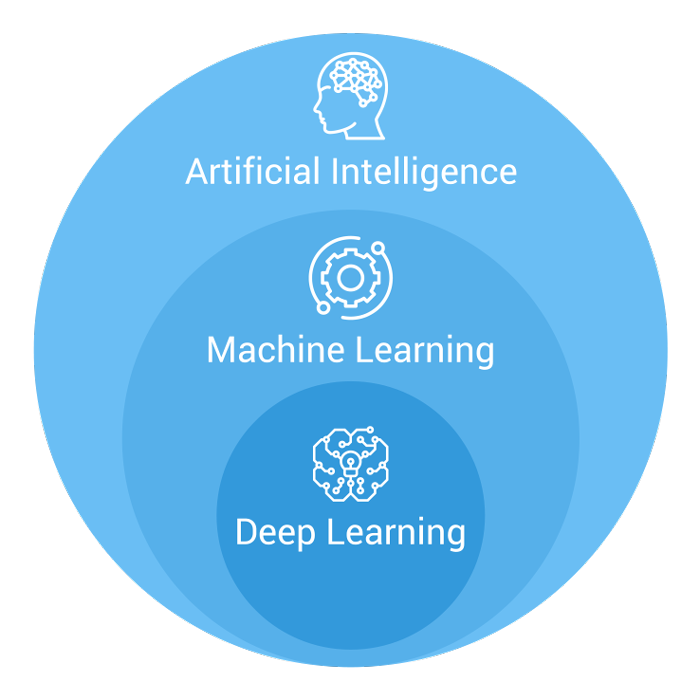

## The use case: understanding customer behavior while shopping
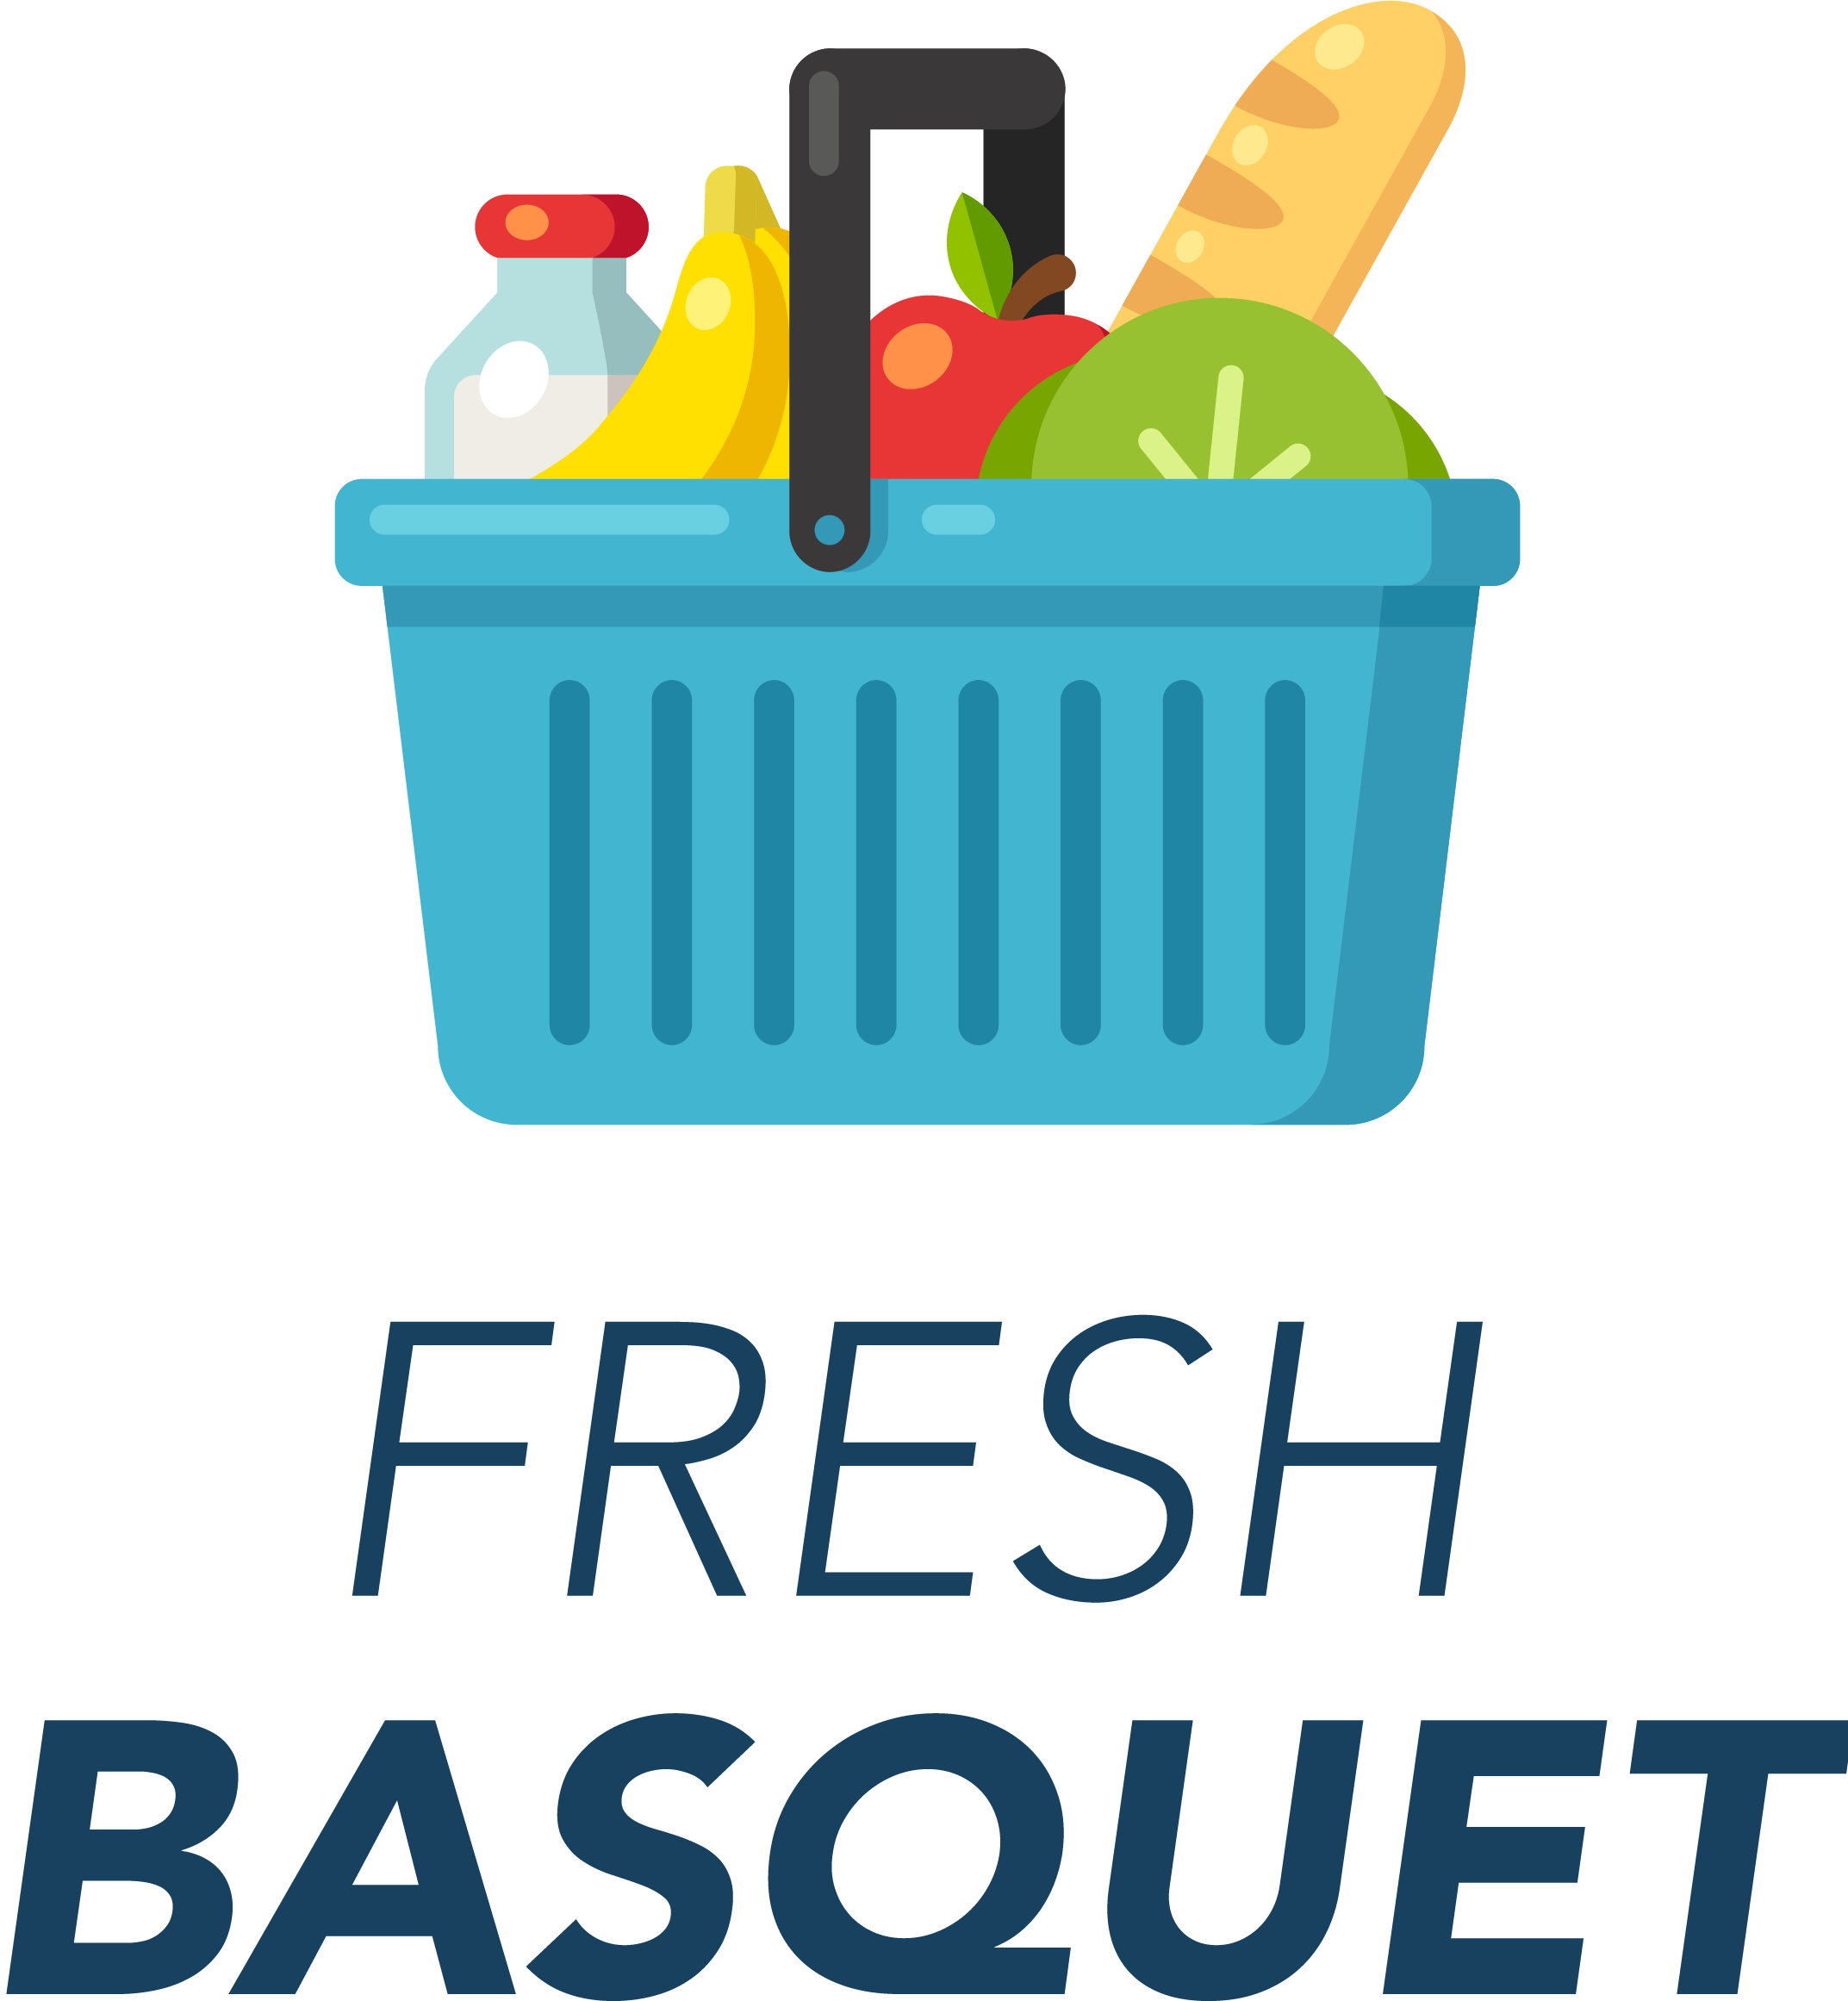


### Step One: Vision

#### the why, what and how

At the beginning of an A.I. project, it can be helpful to establish a vision for the project. This should provide the answer to 4 questions:

* how are people benefitting? (the why for people)
* how is our business benefitting? (the why for bussines)
* what problem do we want to tackle? 
* how are we going to do it?

Our client is a super market franchise. Their mission is to supply fresh food in urban areas. 

They have a solid understanding of their customer basis. They have identified two main customer groups: 

* Young, hip Urbanites
* health-conscious families



### Step 2: Use Case Ideation

We need to create a concrete idea, what should be achieved.

To create useful AI use cases, we should repect the demands posed by the human aspects, as well as the technological and business aspects. We can describe these with the 3 key words:  

* desireability
* feasibility
* viability

*Desireability*

Depending on the context, its about generating value for the recipients. These could be users, or customers. We should make sure that we create something thats adding value for these groups of people. 

*Viability*

Here, we focus on finding use cases, that create value for our company. Successful AI projects tackle some objective that is crucial for our company. Either by supporting our business strategy or adding other value.

*Feasibility*

This touches on the technical aspects. Our solution should be technically feasible. If we can not actually build it, because the technology required does not exist yet, or is otherwise out of reach, the best ideas are useless. 

**here: Offering better suited products to avoid waste**

In the ideation phase, we and our client *Fresh Basquet*, found a project that fits all requirements:

We are aiming to reduce waste, by better identifying what our customers need. 

The customers profit from the better offerings, that are more tailored to their needs-> *Desireability*

The company benefits by reducing waste and thus reducing costs while increasing revenue.-> *Viability*

On the technological side, we start with a relatively simple A.I. approach. Based on RFID chips, **Fresh Basquet** can already track the movement of their customers through their markets. We are building an Neural Network based A.I. understand this movement and thus the needs of our customers. 


We will follow an incremental approach:

starting simple and increasing complexity step-by-step. 

### Step 3: Data Exploration and experimentation

#### Loading functions and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

from sklearn.datasets import make_circles


def load_data(total_data_points, nr_clusters):
    '''
    Input:  total_data_points : number of samples in total
            nr_clusters : number of clusters
    ussses the make_blobs funktion from sklearn to create random data clusters, with standard deviation of 2 and random state 42
    returns:
    data : array with shape (total_data_pointsv, 2), coordinates of data points (float)
    targets: array with shape (total_data_points, 1), class of the cluster (int)
    if the number of clusters is smaller than 4, the stackfuel colors are used for the target_colors vector
    target_colors : vector with the color for each class, shape (len(data), 1) (string)
    '''
    data, targets = make_blobs(n_samples=total_data_points, centers=nr_clusters, cluster_std=2.0, random_state=42)
    colors = ['#FF2F92', '#9437FF', '#00E492', '#00BDFF']
    target_colors = []

    
    if nr_clusters < 4:
        for i in range(len(targets)):
            target_colors.append(colors[targets[i]])
    else:
        target_colors = targets
    return data, targets, target_colors

def plot_data(data,colors):
    fig,ax=plt.subplots(figsize=[10,10])
    ax.scatter(data[:,0], data[:,1],c=colors)
    ax.set_xlabel('x-coordinate',fontsize=15)
    ax.set_ylabel('y-coordinate',fontsize=15)
    ax.set_title('Snapshot of the movement data',fontsize=18)
    
def plot_sigmoid(range_1, range_2):
    #create sigmoid values
    x = np.linspace(range_1, range_2, 200)
    y = 1 / (1 + np.exp(-x))
    #create decision boundary
    x_line = np.linspace(0, 0, 10)
    y_line = np.linspace(0, 1, 10)
    #crate plot
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=3, color='#00BDFF', label='Sigmoid')
    ax.plot(x_line, y_line, linewidth=3, color='black', label='Decision Border')
    ax.legend()
    ax.set_title('Activation function sigmoid')
    ax.set_xlabel('$\Sigma$')
    ax.set_ylabel('logistic funktion')
    ax.plot

def plot_dist(datas,mode='absolute'):
    
    fig, ax = plt.subplots(figsize=[10,6])
    data=pd.Series(datas).replace({'#FF2F92':'Families','#9437FF':'Urbanites'})
    data

    
    
    # set plot title
    ax.set_title("Distribution of Customers",fontsize=18)

    # set x-axis name
    ax.set_xlabel("customer classes",size=15)
    if mode=='absolute':
            # set y-axis name
            ax.set_ylabel("frequency",size=15)

            pd.Series(data).value_counts(normalize=False).sort_index().plot.bar(color='b')
    elif mode=='relative':
            ax.set_ylabel("relative frequency",size=15)
        #sns.distplot(data,kde=False,ax=ax,color='blue',hist=True,hist_kws={'density':True})
            pd.Series(data).value_counts(normalize=True).sort_index().plot.bar(color='b',rot=44)
    else:
            return "Please choose either absolute or relative as mode"
    plt.show()
def plot_decision_boundary(data, steps, model, target_colors, cmap_range=0.2):
    #create grid over coordinate space
    x_lin = np.linspace(data[:,0].min() -1, data[:,0].max() +1 , steps)
    y_lin = np.linspace(data[:,1].min() -1, data[:,1].max() +1 , steps)
    x, y = np.meshgrid(x_lin, y_lin)
    #apply prediction to meshgrid
    #create toupled data points (10000,2)
    linspace_data = np.c_[x.ravel(), y.ravel()]
    pred = model.predict(linspace_data)
    if pred.shape[1] >= 2:
        # invert encoding
        pred = np.argmax(pred, axis=1)# invert encoding
    #reshape prediction to grid shape (steps, steps)
    pred_grid = pred.reshape(x.shape)
    #creating dots for 50% decision boundary
    x_reshaped = np.c_[x.ravel()]
    y_reshaped = np.c_[y.ravel()]
    x_line = []
    y_line = []
    for i in range(len(pred)):
        if (pred[i] <= 0.51 and pred[i] >= 0.49):
            x_line.append(x_reshaped[i])
            y_line.append(y_reshaped[i])
    #create plot
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('Blues')
    v_min= 0.5 - cmap_range
    v_max = 0.5 + cmap_range
    ax.contourf(x, y, pred_grid, cmap=cmap, vmin=v_min, vmax=v_max)
    plt.scatter(data[:,0], data[:,1], c=target_colors)
    plt.plot(x_line, y_line, c='black')

def load_circular_data(total_data_points=1000):
    data, targets = make_circles(n_samples=total_data_points, noise=0.05)
    colors = ['#FF2F92','#9437FF','#00BDFF', '#00E492' ]
    target_colors = []
    for i in range(len(targets)):
            target_colors.append(colors[targets[i]])
    return data, targets, target_colors

def plot_circle_data(data_circle, targets_circle, colors_circle):
    fig, ax = plt.subplots(figsize=[10,10])
    ax.scatter(data_circle[:,0], data_circle[:,1], c=colors_circle)
    ax.set_xlabel('x-coordinate',fontsize=15)
    ax.set_ylabel('y-coordinate',fontsize=15)
    ax.set_title('Visualizing movement data: circular retail area',fontsize=18)
    ax.set_aspect('equal')

def transform_polar(data_circle):
    data_polar=[]

    for i in range(len(data_circle)):
        rho=np.sqrt(data_circle[i,0]**2+data_circle[i,1]**2)
        if data_circle[i,0]>0:
            phi =np.arctan(data_circle[i,1]/data_circle[i,0])
        elif (data_circle[i,0]<0) & (data_circle[i,1]>=0):
            phi =np.arctan(data_circle[i,1]/data_circle[i,0])+np.pi
        elif (data_circle[i,0]<0) & (data_circle[i,1]<0):
            phi =np.arctan(data_circle[i,1]/data_circle[i,0])-np.pi
        elif (data_circle[i,0]==0) & (data_circle[i,1]<0):
            phi=-np.pi
        elif (data_circle[i,0]==0) & (data_circle[i,1]>0):
            phi=np.pi
        else:
            phi = np.nan
        data_polar.append([rho,phi])
    
    data_polar=np.array(data_polar)
    return data_polar
def plot_transformed_data(test,colors_circle):
    fig, ax = plt.subplots(figsize=[10,10])
    ax.scatter(test[:,0], test[:,1], c=colors_circle)
    ax.set_xlabel('radial coordinate $r$',fontsize=15)
    ax.set_ylabel('polar-angle $\phi$',fontsize=15);
    ax.set_title('transformed movement data',fontsize=18)

def plot_decision_boundary_complex(data, steps, model, target_colors, cmap_range=0.1, s=4, alpha=0.3):
    #create grid over coordinate space
    x_lin = np.linspace(data[:,0].min() -1, data[:,0].max() +1 , steps)
    y_lin = np.linspace(data[:,1].min() -1, data[:,1].max() +1 , steps)
    x, y = np.meshgrid(x_lin, y_lin)
    #apply prediction to meshgrid
    #create toupled data points (10000,2)
    linspace_data = np.c_[x.ravel(), y.ravel()]
    pred = model.predict(linspace_data)
    pred_grid = pred.reshape(x.shape)
    #create plot
    fig, ax = plt.subplots(figsize=[10,10])
    cmap = plt.get_cmap('Blues')
    v_min= 0.5 - cmap_range
    v_max = 0.5 + cmap_range
    ax.contourf(x, y, pred_grid, cmap=cmap, vmin=v_min, vmax=v_max)
    plt.scatter(data[:,0], data[:,1], c=target_colors, s=s, alpha=alpha)  
    ax.set_xlabel('x-coordinate',fontsize=15)
    ax.set_ylabel('y-coordinate',fontsize=15)
    ax.set_title('Decision boundary and movement data')

def plot_loss(model_hist):
    # define figure and axes
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    # plot training & validation loss values
    axs[0].plot(model_hist.history['loss'], c='#00E492', linewidth=2)
    axs[0].plot(model_hist.history['val_loss'], c='#00BDFF', linewidth=2)
    axs[0].set_title('Loss of the model',fontsize=18)
    axs[0].set_ylabel('Loss',fontsize=15)
    axs[0].set_xlabel('Epoche',fontsize=15)
    axs[0].legend(['training set', 'validation set'])
    if 'accuracy' in model_hist.history.keys():
        axs[1].plot(model_hist.history['accuracy'], c='#00E492', linewidth=2)
        axs[1].plot(model_hist.history['val_accuracy'], c='#00BDFF', linewidth=2)
        axs[1].set_title('Accuracy of the model',fontsize=18)
        axs[1].set_ylabel('Accuracy',fontsize=15)
        axs[1].set_xlabel('Epoche',fontsize=15)
        axs[1].legend(['training set', 'validation set'])
        plt.tight_layout()
    elif 'mean_absolute_error' in model_hist.history.keys():
        axs[1].plot(model_hist.history['mean_absolute_error'], c='#00E492', linewidth=2)
        axs[1].plot(model_hist.history['val_mean_absolute_error'], c='#00BDFF', linewidth=2)
        axs[1].set_title('Mean absolute error des Modells',fontsize=18)
        axs[1].set_ylabel('Mean absolute error',fontsize=15)
        axs[1].set_xlabel('Epoche',fontsize=15)
        axs[1].legend(['training set', 'validation set'])
        plt.tight_layout()
    else:
        return 'Please choose a different metric'


#### Explorative Data Analysis

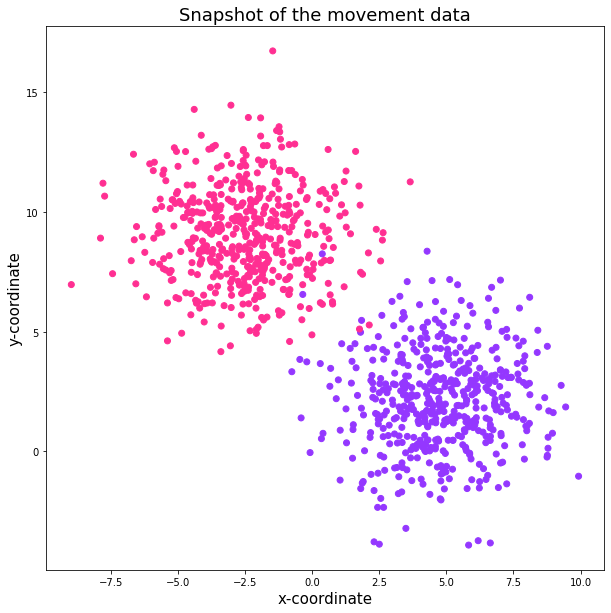

In [ ]:
data_2class, targets_2class, colors_2class = load_data(total_data_points=1000, nr_clusters=2)
    
plot_data(data_2class,colors_2class)

We see, that the two customer groups are mostly situated in different areas of the super market. 

One other import question we need to address is, whether the two classes are balanced. Otherwise, or model might run into trouble while learning

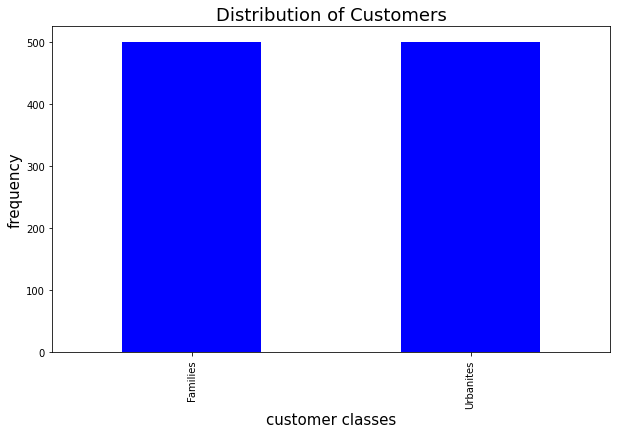

In [ ]:
plot_dist(colors_2class)

#### Train-Test-Split


To evaluate the performance, we need to reserve part of the data to testing.

In [ ]:
from sklearn.model_selection import train_test_split


# train-test-split
train_x, test_x, train_y, test_y = train_test_split(data_2class,
                                                    targets_2class,
                                                    test_size=0.1,   
                                                    random_state=42)

#### Model Building

We now need to create our model. We decided to create neural network. To create it, we will use TensorFlow with Keras. 
TensorFlow is a framework created and maintained by Google. Its specifically designed to create neural networks. 

Keras was created as an interface between python and tensorflow. 

It makes it significantly easier and faster to create neural networks, especially during experimentation and prototyping. 

In recent upgrades, Keras has been integrated into TensorFlow.

Lets begin by loading the necessary libraries. 

In [ ]:
import tensorflow as tf

tf.random.set_seed(2)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In the simplest form, the network consists of a simple neuron. Neurons are the building blocks of Neural Networks and are responsible for the name. 

Lets have a look:



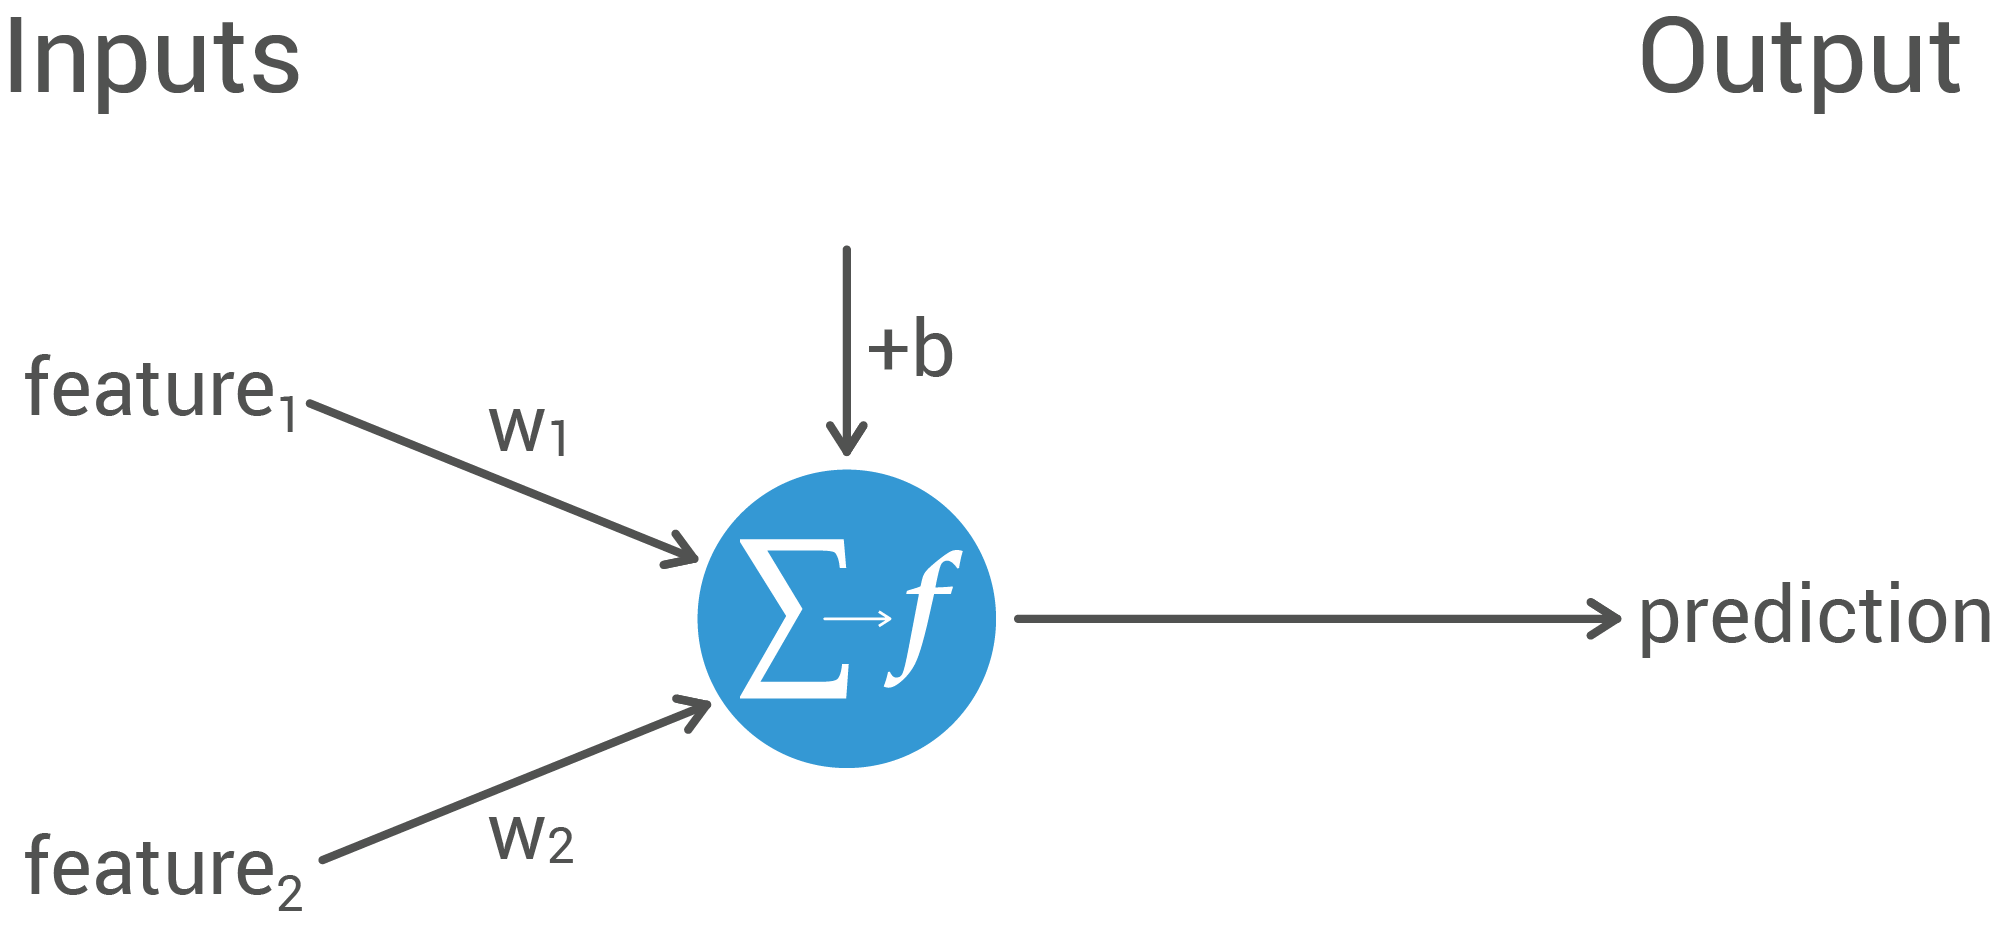

A neuron receives some inputs that we may denote by $\vec{X}$. These will be weighted with a set of weights $w_i$. 

In the first layer, the inputs will be features of the data. For us, it will be the x- and y-coordinates. 

In deeper layers, the input might be the output of previous layers. The output will be generated as follows.

* Each input $X_i$ will be multiplied by the corresponding weight $w_i$
* The result is added $\sum = \sum_i X_i \cdot w_i$ and fed into a so-called activation function
* The activation function can be specific to the neuron and strongly influences the behavior

For now, we only want to predict the membership to one of two classes. 

This task is called a binary classification problem. Here, we can use the logistic function.

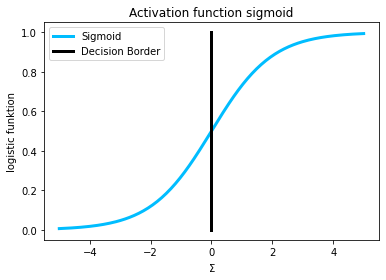

In [ ]:
plot_sigmoid(-5,5)

Thus, the neuron mimics the behavior of actual cells. Neurons stay inactive until the input crosses a certain threshold. 

For a binary classification, we map the to classes to 0 and 1. 
The logistic function creates output between 0 and 1. We can interpret the output as a probability for a certain input to correspond to the class encoded as 1. 

Mathematically, the logistic function is defined as

$f(\Sigma)=\frac{1}{1+e^{-\Sigma}}$

**Now lets create our simple single neuron neural network!**

The networks we are interested in are called Sequential in TensorFlow/keras. 
This model consists of a set of layers. 

For now, we will only use so-called dense layers. 

Dense means, that all the neurons of one layer are connected to all the neurons of the following layer. This will become more clear once we create more complicated models. 

For now, we create a Sequential network with a single Dense Layer. 

##### Initializing the model 

We will only use a single Neuron in this layer. In the first layer of each network, we must specify the shape of the input. In our case, the input is of shape (2,). This specifies that the network should expect to values as input. 
Finally, we will specify to use the 'sigmoid' activation function. This refers to the logistic function given above. 


In [ ]:
model = Sequential([Dense(1, input_shape=(2,), activation='sigmoid')])

##### Compiling the model


Once we have initialized the model, we need to prepare it, to learn from the data we provide. 

We are now employing "supervised learning".

Here, our model is shown sample data. That means we supply positional data together with the correct customer group. 

Using the data, the model will try to predict the correct group. It then gets direct feedback how good the prediction was, using the correct group labels. 

This feedback corresponds to information how close the prediction was relative to the actual value. 

We can think of the childrens game "Hit the pot" as an analogy. Here, a child is blindfolded and is trying to hit a cooking pot with a wooden spoon. The child is guessing the position of the pot and tries to hit it. The other kids provide feedback by shouting hot if the guesses get better or cold, if the guesses are getting worse. 

For Neural Networks we must define a function that provides a sense of "closeness" with respect to the correct prediction. 

This is called the loss function. 

For binary classification, the usual choice is the (binary) crossentropy. 

$H(p,q)= -\sum_i p_i \log (q_i)$

It establishes a notion of distance between probability distributions. 

Because we can consider the real values, 0 and 1, also as a probability distribution, we can use this function to tell our model how good the predictions are. 

We also need to specify an optimizer and the metrics we want to have displayed to assess the performance of our model. 

**Optimizer**

Basically, the strategy our model uses to learn and improve the predictions. 
The loss function tells the modell how close the predictions are to the real values. The optimizer then specifies strategies to minimize this "distance". Here we choose a simple optimizer. 'SGD' stands for stochastic gradient descent. It changes the weights of our model to find the set of values that results in the minimal loss. 

**Metrics**

Here we define the metrics about our model that we want to look at to assess its quality. For now, we can make use of the accuracy. It corresponds to the percentage of correct predictions. 

In [ ]:
model.compile(loss='binary_crossentropy',
                   optimizer='SGD', 
                   metrics=['accuracy'])

##### Training the model

Now we can start to train our model using our training data. 

In TensorFlow/Keras, we can use the `fit()`-method of our model. 

We must provide the features of our training data, the correct labels. Also, we should specify how often the model should look at all the data points. One iteration over all training data is called an epoch. The parameter `epochs` specifies the number of these iterations we want to use to train our model. Usually, the model performs better on the training data with increasing number of epochs. But it might occur, that our model is just learning our examples 'by heart' and really understanding the underlying relations. That is called overfitting.   

We can identify overfitting if our model performs much better on the training data, than on previously unknown data. To check, we make an additional validation split. 

`valdiation_split` denotes the ratio of training data that we will not show our model, but use to check for overfitting. 

`batch_size` is the number of examples we show the model simultaneously. After each batch, the model will get feedback about the performance and change the parameters accordingly. 

In [ ]:
model_hist = model.fit(train_x, train_y, 
                                epochs=1, 
                                batch_size=1, 
                                validation_split=0.1)

810/810 [==============================] - 1s 1ms/step - loss: 0.6612 - accuracy: 0.8387 - val_loss: 0.0443 - val_accuracy: 0.9889


##### Model Evaluation

Now its time to assess our model. We were able to achieve an accuracy of almost 99% on the evaluation data. Thats promising!

Lets check the test data!
 

In [ ]:
score = model.evaluate(test_x, test_y) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 1.0000
Test loss: 0.026494480669498444
Test accuracy: 1.0


Wow! We got perfect accuracy! Thats great! 

So we are able to predict the correct customer group with high accuracy. Now its time, to use this model to learn more about our customers. For this, we are visualizing the predicted probabilities of our model. If we understand these probabilities, we get a better idea where the customer groups are more likely to be and thus we can get a better idea which goods their are interested in and also which goods they might not even have seen. 

Ultimately, we need more sophisticated models to fully understand the customer groups but this simple model might already give us interesting insights. 



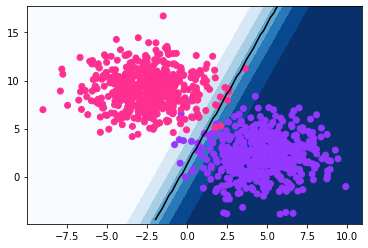

In [ ]:
plot_decision_boundary(data=data_2class, 
                       steps=100, 
                       model=model, 
                       target_colors=colors_2class, 
                       cmap_range=0.4)

Darker shades of blue correspond to higher percentages to belong to a certain group. Our model is defining a linear decision border, dividing the customers pretty accurately into two groups. 

If we have more knowledge about the actual layout of the super market, we can use this information to understand which goods the groups are looking at while shopping. We then might be able to optimize our layout, which goods we stock or the positioning of the goods to make it easier for our customers to find the goods they need and thus to reduce food waste. 

With only a single layer with a single neuron, our model performs a so-called logistic regression. Here, the separation between groups follows a straight line. 

But what happens if we have more complicated data? 

Lets take a look! In the following we have data from a special super market. In the center of the retail area is a circular hole through which one can look into the lower levels of the super market. 

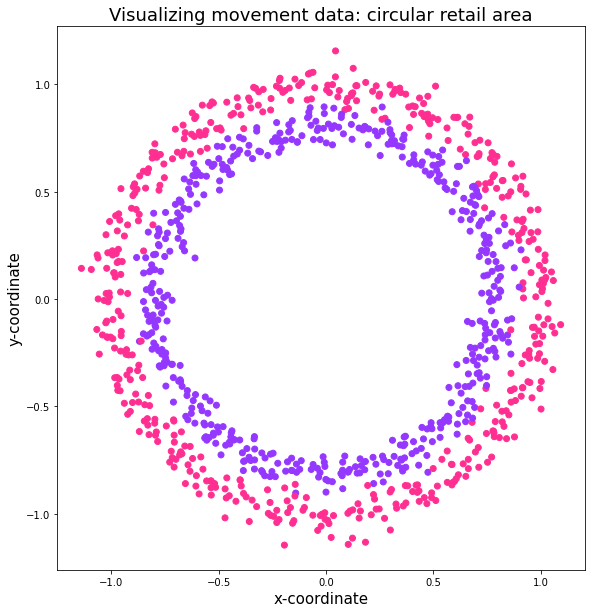

In [ ]:
data_circle, targets_circle, colors_circle = load_circular_data(1000)

plot_circle_data(data_circle, targets_circle, colors_circle)

Now, lets take the model from before and try to classify the customers!

In [ ]:
model_circ = Sequential([Dense(1, input_shape=(2,), activation='sigmoid')])

In [ ]:
model_circ.compile(loss='binary_crossentropy',
                   optimizer='SGD', 
                   metrics=['accuracy'])

In [ ]:
# train-test-split
data_circle_train, data_circle_test, targets_circle_train, targets_circle_test = train_test_split(data_circle,
                                       targets_circle, 
                                       test_size=0.1,
                                       random_state=42)

In [ ]:
model_circ_hist = model_circ.fit(data_circle_train, targets_circle_train, 
                                epochs=1, 
                                batch_size=1, 
                                validation_split=0.1)

810/810 [==============================] - 1s 1ms/step - loss: 0.7338 - accuracy: 0.5197 - val_loss: 0.7354 - val_accuracy: 0.4000


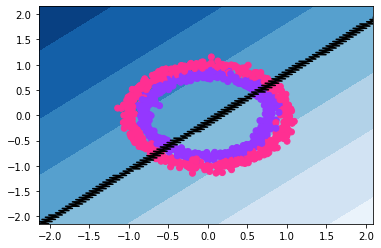

In [ ]:
plot_decision_boundary(data=data_circle, 
                       steps=100, 
                       model=model_circ, 
                       target_colors=colors_circle, 
                       cmap_range=0.4)

We can see that our model is not equipped to separate the customer groups. What should we do?

Historically, people needed to come up with intelligent transformations to make data linearly separable. 

Example: here, we see a circular symmetry due to the shape of the retail area. we can take advantage of this symmetry by using a coordinate transform. 

Rather than using x and y coordinates, we can use the distance to the center and an angle. These are called polar coordinates: 

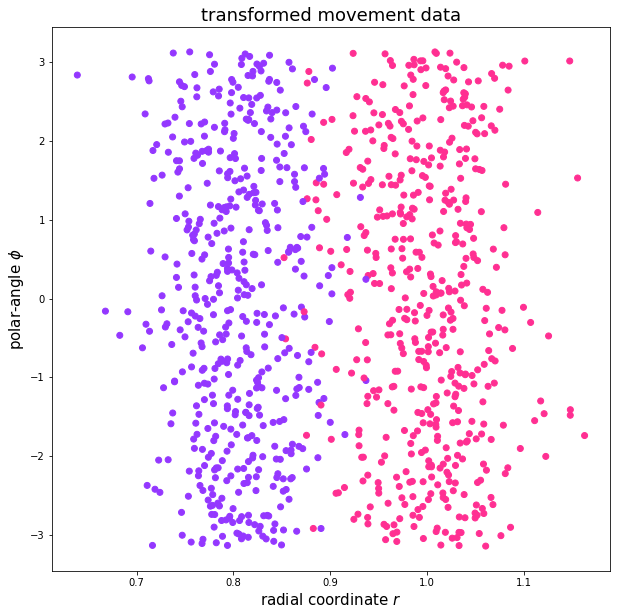

In [ ]:
plot_transformed_data(transform_polar(data_circle),colors_circle)

The obvious problem is, that not all data we may encounter may be as easily transformed into linearly separable data. 

Thats where more complex networks can come in handy. They can accomplish such transformations even in more complicated scenarios. 


With more than one layer, we need to define some vocabulary: 

**Input layer**

This is the first, topmost layer. Here, the data is inserted into the network. In this layer we need to specify the shape of the data, as we have already seen.

**Hidden layer**

these are the layers immediately following the input layer up to the output layer. They are 'hidden' because they do not have any connection to the world outside of the network. 

**Output layer**

The output layer strongly influences the behavior of the network. Especially, it defines what kind of tasks the network can perform. Here, the activation function is of the biggest importance. For binary classification we have already encountered the logistic function, or sigmoid. For other tasks, we might need a linear activation function (general regression/Predicting values rather than classes) or the softmax function (classification with more than two classes). 


So we need to figure out, how to use more than a single layer. One important aspect is the activation function for hidden layers. To achieve the kind of transformations we are looking for, we need non-linear activation functions. One problem with these functions is, that they are computational expansive. 

One good compromise is the Rectified Linear Unit - ReLU in short. This function is piecewise linear. For inputs lower than zero its zero and its linear for positive values



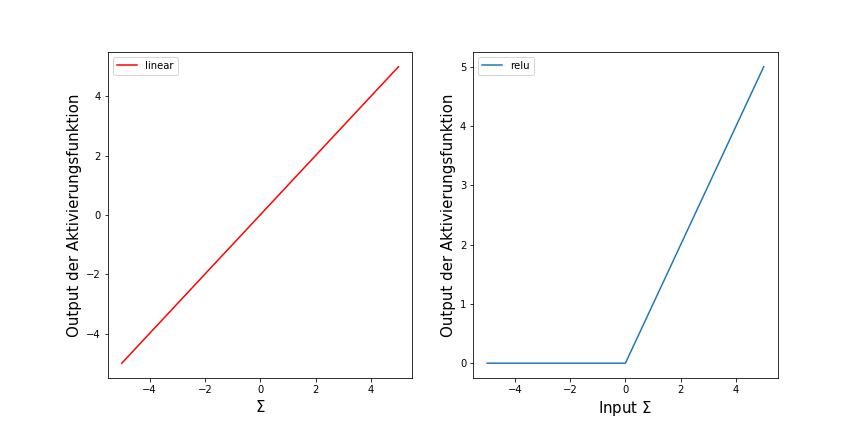

This is generally a good choice for activation functions in hidden layers. Now how do we create a model with hidden layers using TensorFlow / keras? Basically in the same way that we used for our single neuron. We create a Sequential Model. In the argumaent, we supply a set of Dense Layers. The order in which put the layers inside the arguments of the Sequential function defines the order of the layers in the network. In the first layer we need to specify the shape of the input, as before. 

The first number in Dense specifies the number of fully connected layers in the network. Lets create a model with as single hidden layer. In the input layer, we will use 12 neurons, in the hidden layer six and the output layer must have 1 for binary classification. In the input und hidden layer, we will use relu and in the final layer, we will use the sigmoid activation function. 

In [ ]:
circle_model = Sequential([
    Dense(12, input_shape=(2,), activation='relu'), # Input Layer
    Dense(6, activation='relu'), # Hidden Layer 
    Dense(1, activation='sigmoid')]) # Output Layer

For the compilation, we do not need to change anything. 


In [ ]:
circle_model.compile(loss='binary_crossentropy',
                     optimizer='sgd', 
                     metrics=['accuracy'])

Now, we train our model using the circular data. Because the data is more complicated, we should aim for more than a single epoch. 

In [ ]:
circle_model_hist = circle_model.fit(data_circle_train, 
                                     targets_circle_train, 
                                     epochs=15,
                                     batch_size = 2,
                                     validation_split=0.1)

Epoch 1/15
405/405 [==============================] - 1s 1ms/step - loss: 0.6530 - accuracy: 0.7407 - val_loss: 0.6477 - val_accuracy: 0.7000
Epoch 2/15
405/405 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.7519 - val_loss: 0.6284 - val_accuracy: 0.8667
Epoch 3/15
405/405 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7877 - val_loss: 0.6323 - val_accuracy: 0.6333
Epoch 4/15
405/405 [==============================] - 1s 1ms/step - loss: 0.6134 - accuracy: 0.8111 - val_loss: 0.6262 - val_accuracy: 0.6556
Epoch 5/15
405/405 [==============================] - 1s 1ms/step - loss: 0.5937 - accuracy: 0.8025 - val_loss: 0.5747 - val_accuracy: 0.9222
Epoch 6/15
405/405 [==============================] - 1s 1ms/step - loss: 0.5685 - accuracy: 0.8358 - val_loss: 0.5431 - val_accuracy: 0.9000
Epoch 7/15
405/405 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.8667 - val_loss: 0.5098 - val_accuracy: 0.8778
Epoch 

Lets visualize the decision boundary again

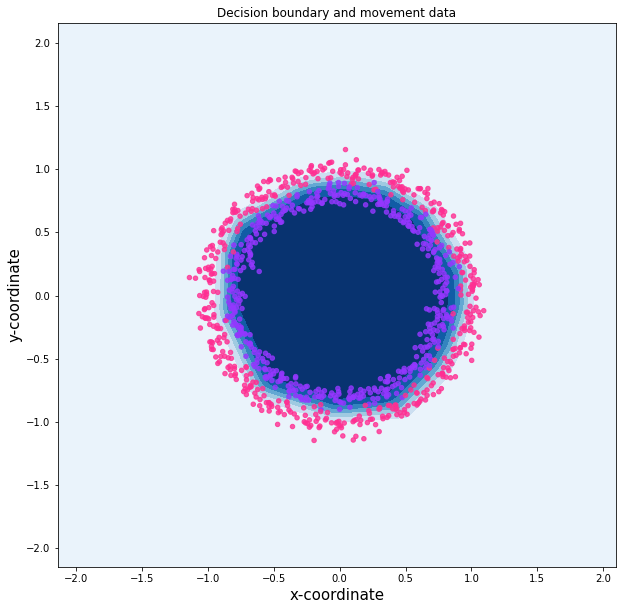

In [ ]:
plot_decision_boundary_complex(data_circle,
                               100,
                               circle_model, 
                               colors_circle, 
                               cmap_range=0.49, 
                               s=20, 
                               alpha=0.8)

##### The learning process

Now that we have used more than a single epoch, its interesting to look at how our model evolved thoughout the epochs. The history object stores the necessary information

In [ ]:
circle_model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The keys given above show us the information stored inside the history object. This information can be used to show the performance of our model throughout the epochs. 


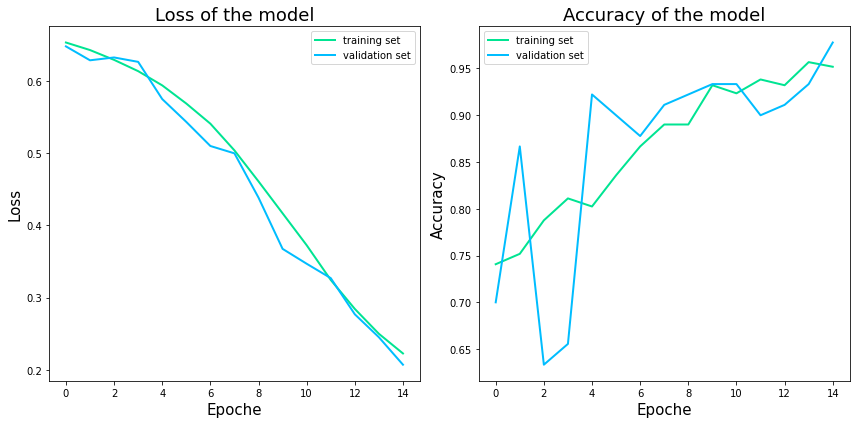

In [ ]:
plot_loss(circle_model_hist)

With enough epochs, our model should be able to accurately separate the customer groups. Now we can check the performance on the test set


In [ ]:
score = circle_model.evaluate(data_circle_test, targets_circle_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9400
Test loss: 0.23433904349803925
Test accuracy: 0.9399999976158142


We can also supply a set of data and get the prediction of the model

This output ist the output of the logistic function in the final layer. 

In [ ]:
predict_y = circle_model.predict(data_circle_test)
print(predict_y[0:5])

[[0.92577267]
 [0.26513922]
 [0.61938417]
 [0.9597555 ]
 [0.37591964]]


<font color = '#17415f' size = 4.5> Did you enjoy the session <br> Visit us at [our homepage](https://stackfuel.com). <br>




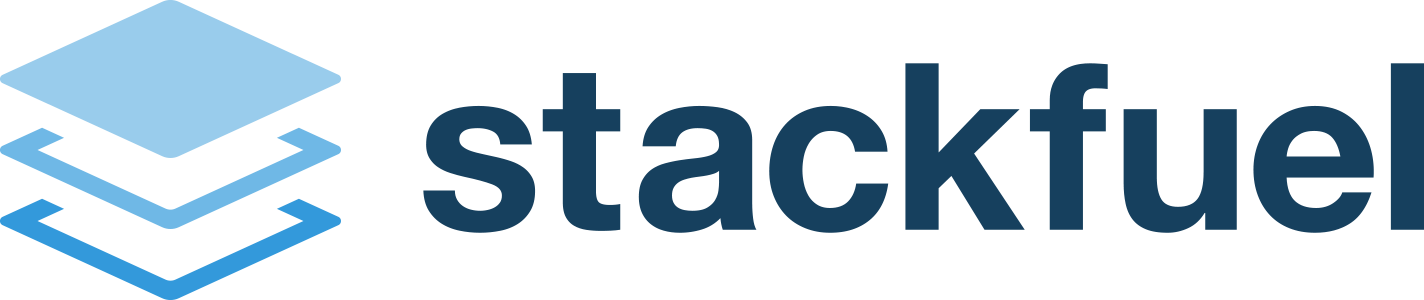